# Random Forest Regressor

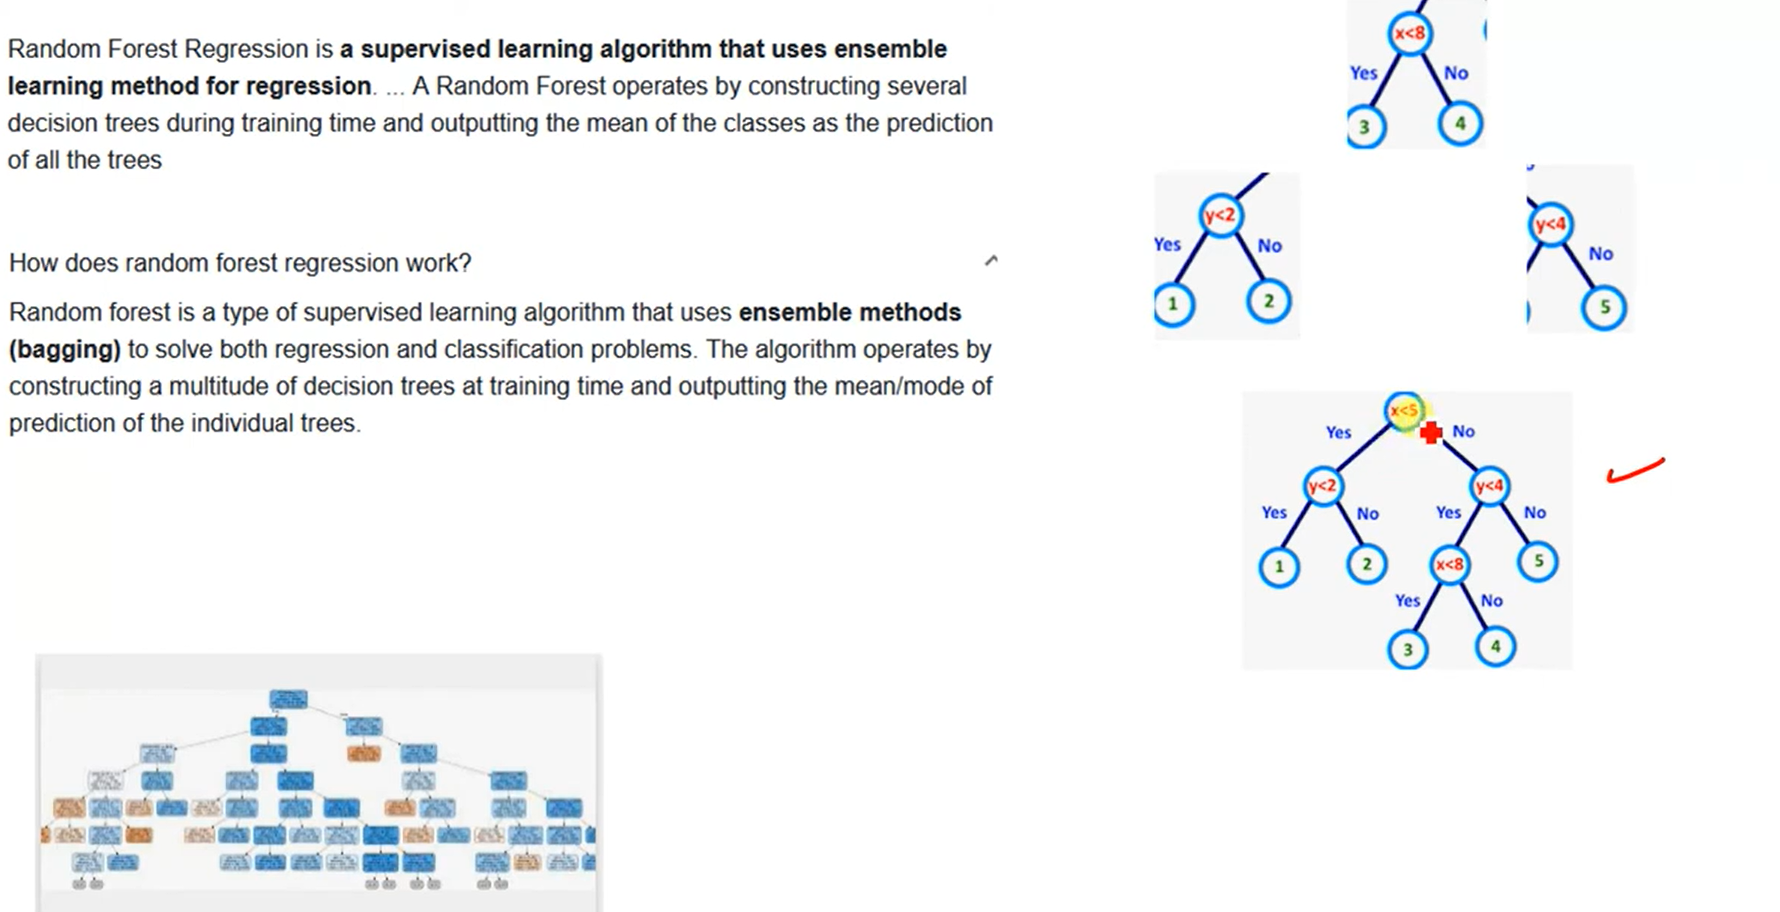

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataframe
x and y variable 

from sklearn.ensemble import RandomForestRegressor

object
fit
predict 
graph 
score

In [3]:
df = pd.read_csv("bankloan[1].csv")
df

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
here are definitions for each of the attributes in the list:

1. ID: A unique identifier assigned to each individual in the dataset.
    
2. Age: The age of the individual in years.

3. Experience: The number of years of work experience the individual has.

4. Income: The amount of money the individual earns.
    
5. ZIP Code: A postal code used to identify the individual's geographic area.
    
6. Family: The size of the individual's family.
    
7. CCAvg: The average spending on credit cards per month by the individual.
    
8. Education: The level of education attained by the individual.
    
9. Mortgage: The amount of mortgage debt the individual has.
    
10. Personal Loan: A binary variable indicating if the individual accepted a personal loan offer.
    
11. Securities Account: A binary variable indicating if the individual has a securities account.
    
12. CD Account: A binary variable indicating if the individual has a certificate of deposit account.
    
13. Online: A binary variable indicating if the individual uses online banking services.
    
14. Credit Card: A binary variable indicating if the individual has a credit card.

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df.shape

(5000, 14)

In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
x = df.iloc[:,0:1].values
x

array([[   1],
       [   2],
       [   3],
       ...,
       [4998],
       [4999],
       [5000]], dtype=int64)

In [11]:
y = df.iloc[:,1].values
y

array([25, 45, 39, ..., 63, 65, 28], dtype=int64)

In [13]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP.Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()

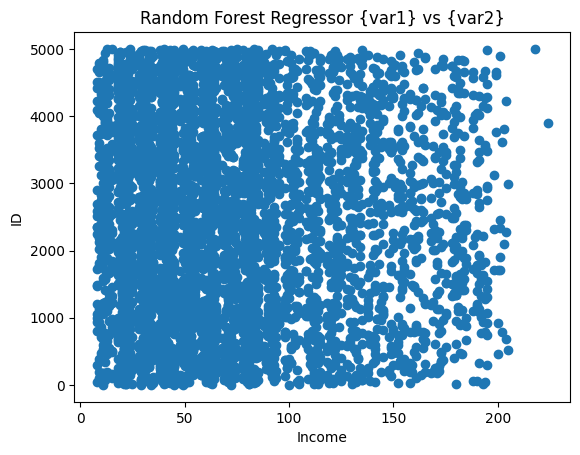

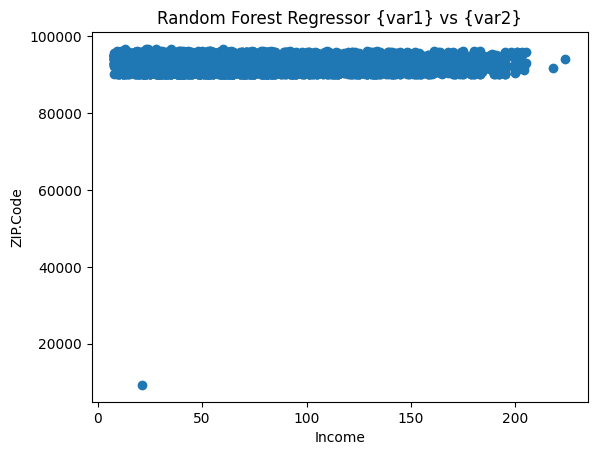

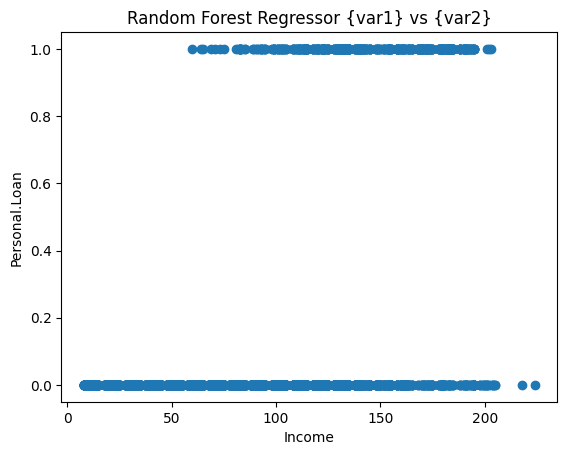

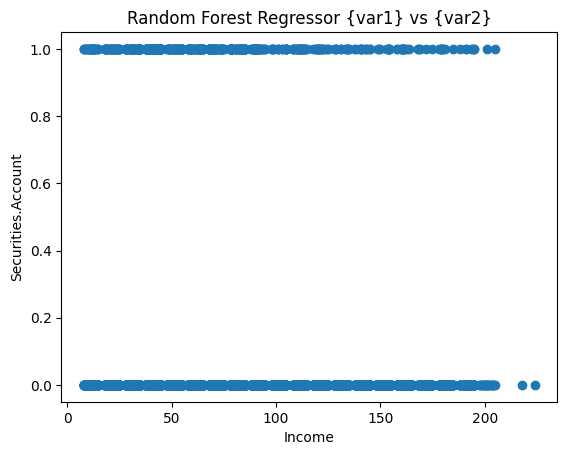

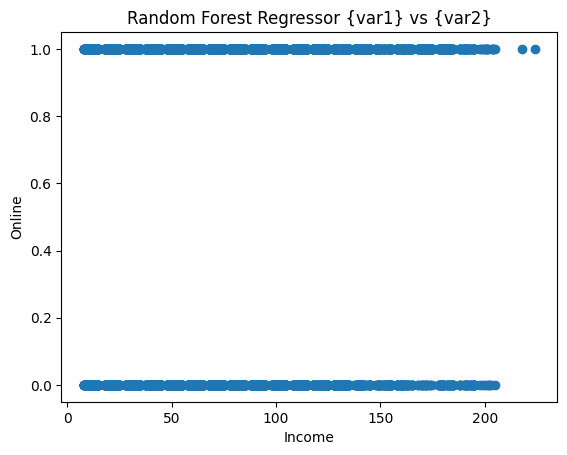

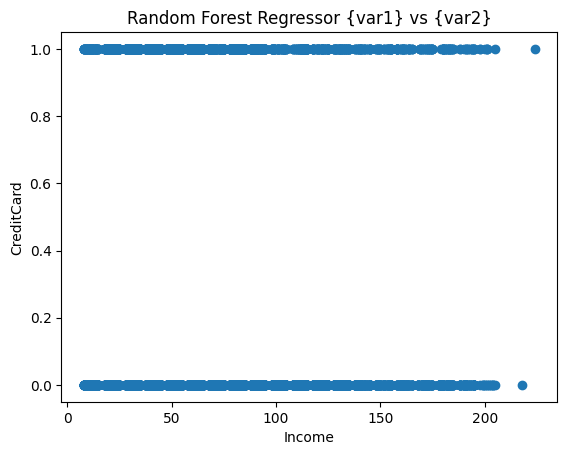

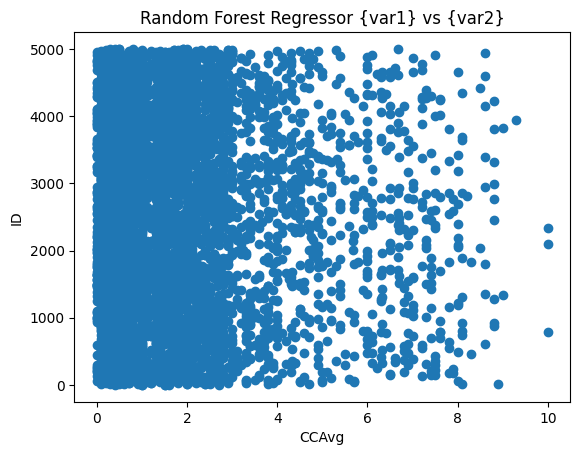

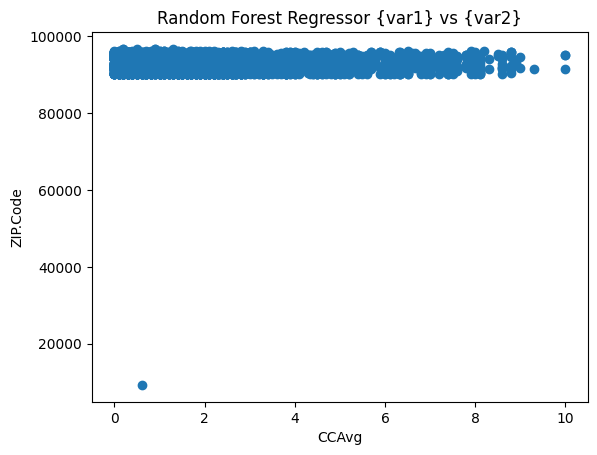

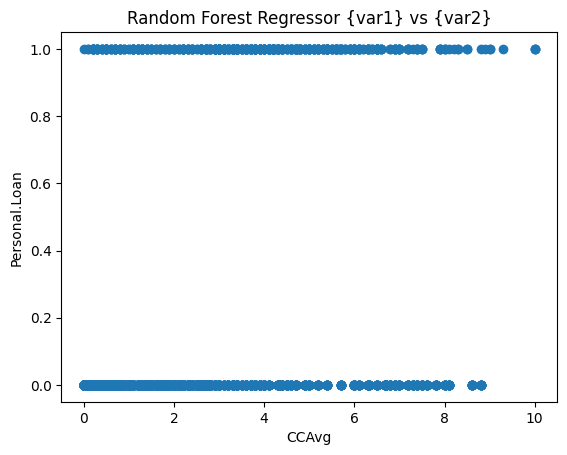

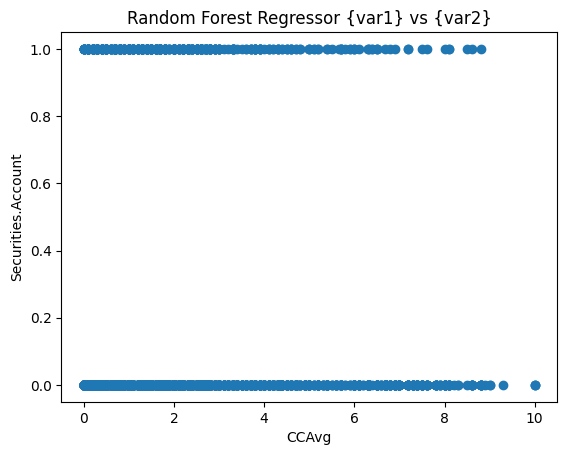

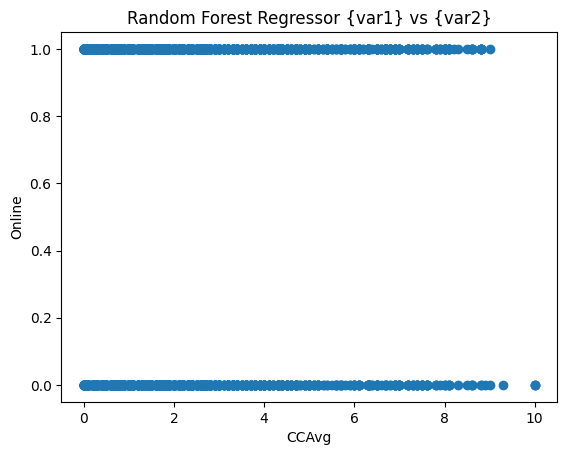

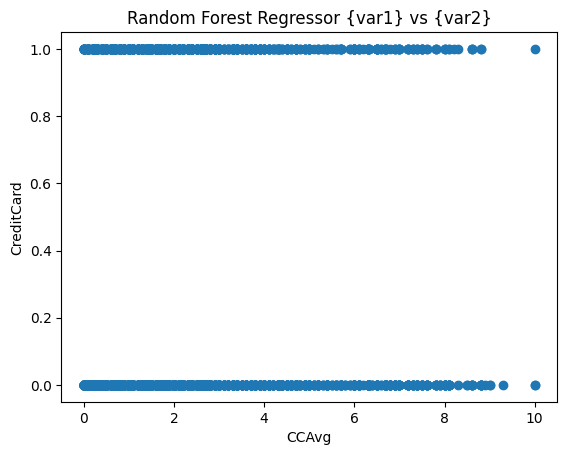

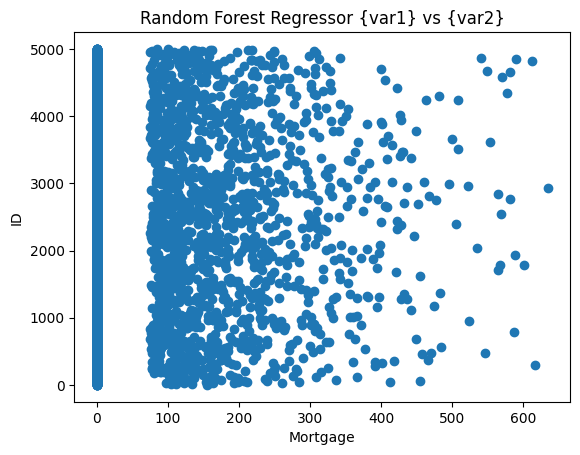

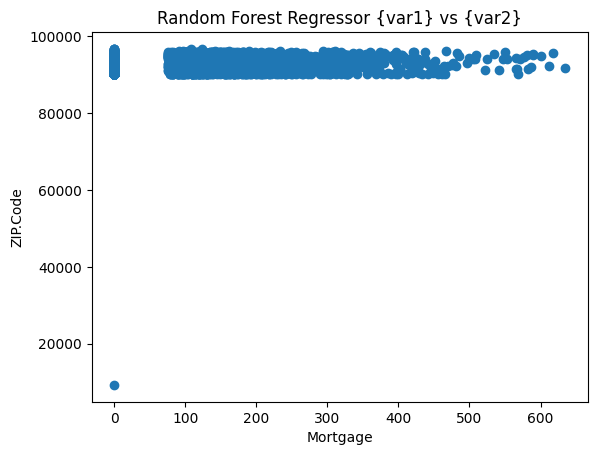

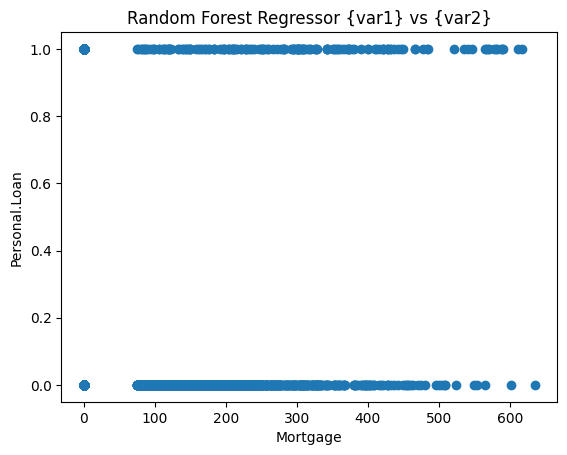

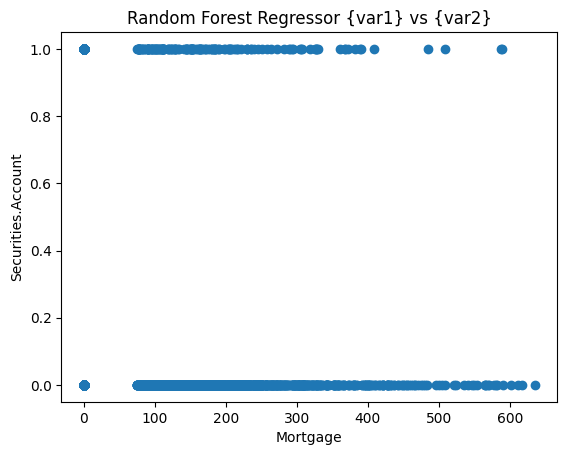

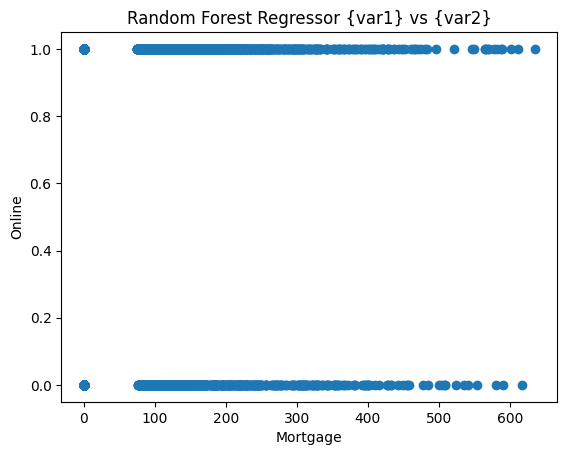

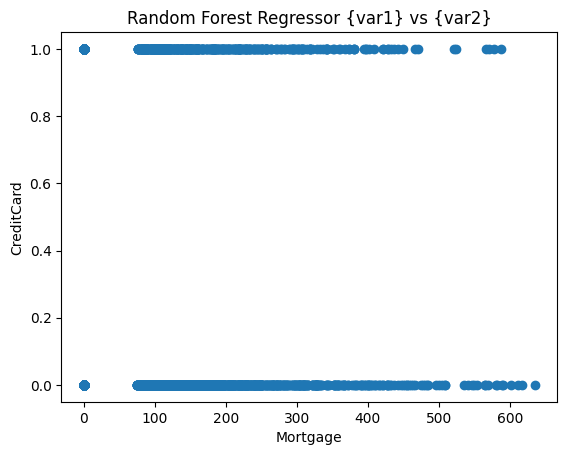

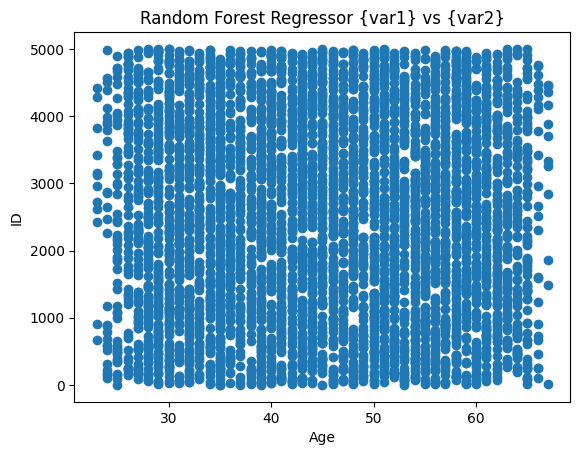

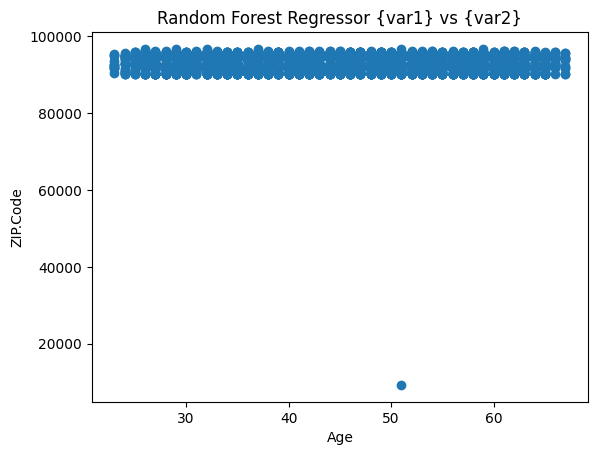

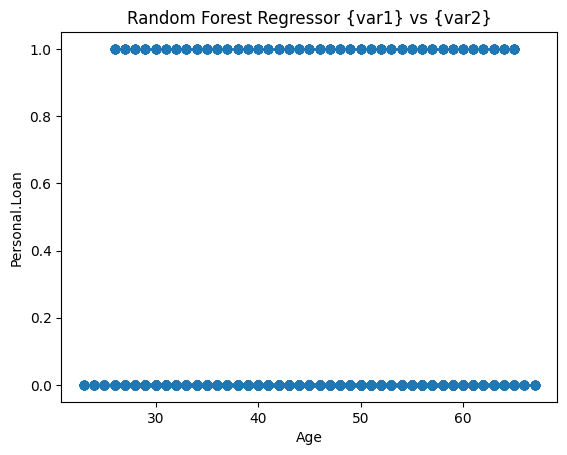

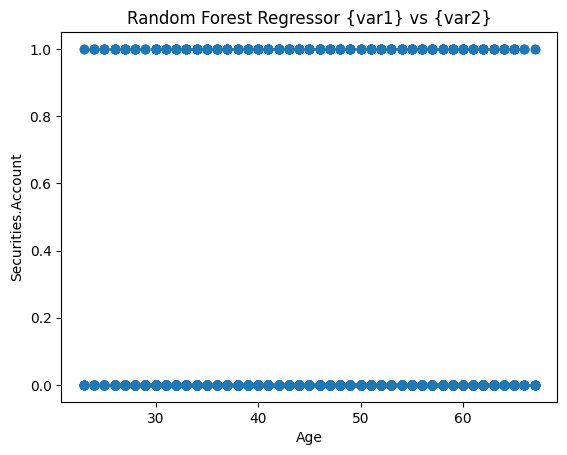

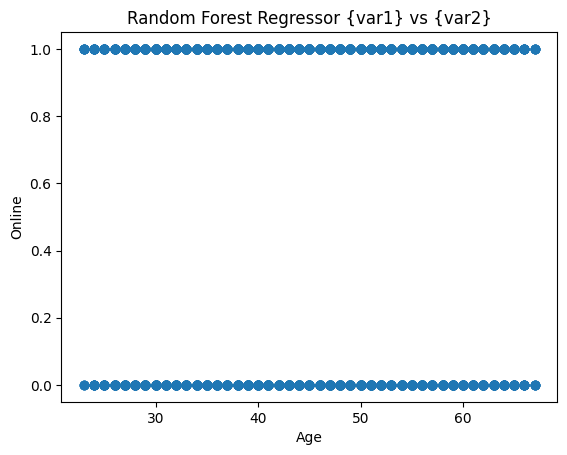

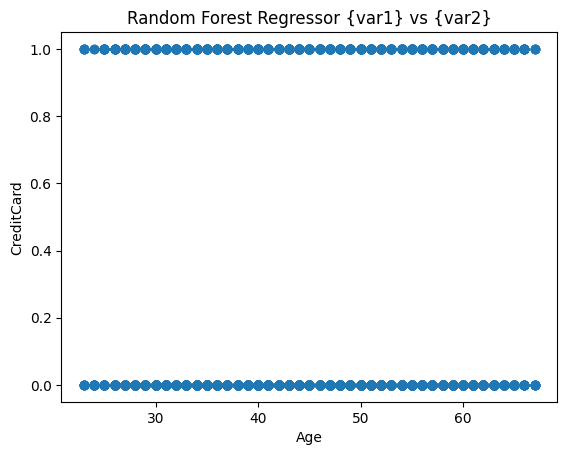

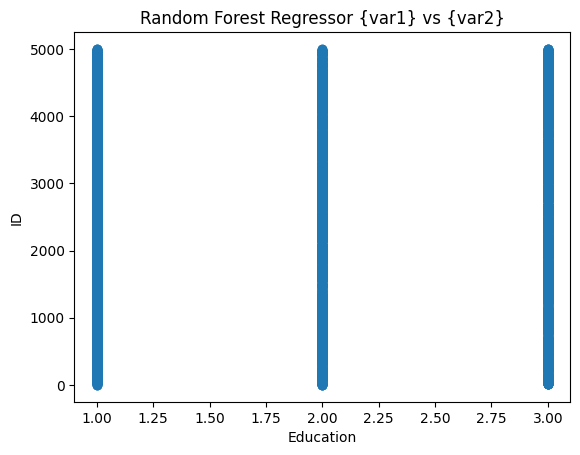

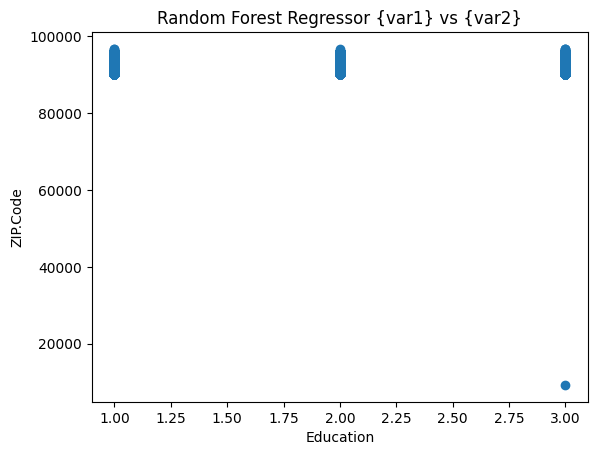

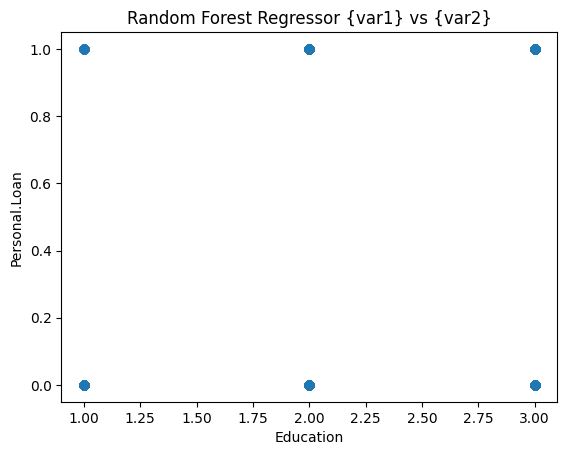

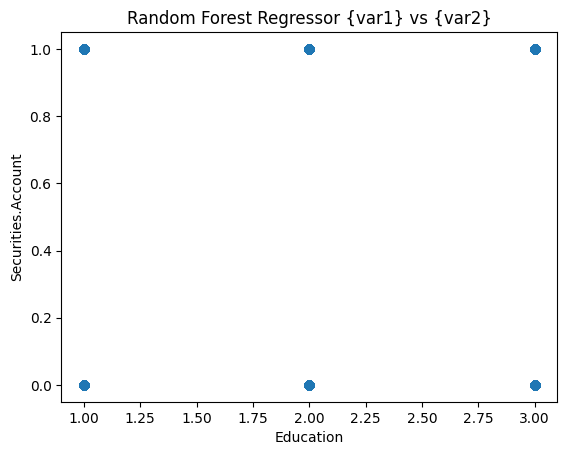

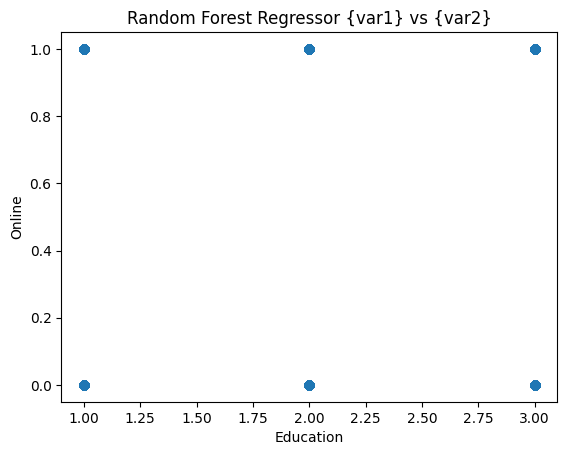

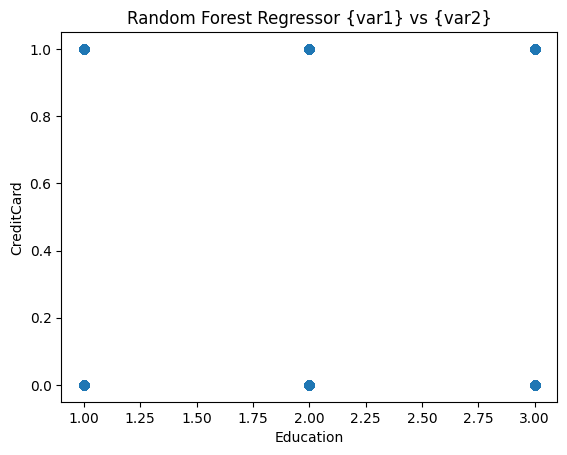

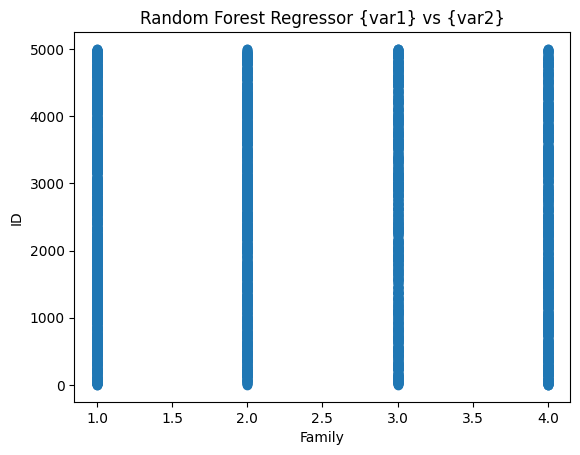

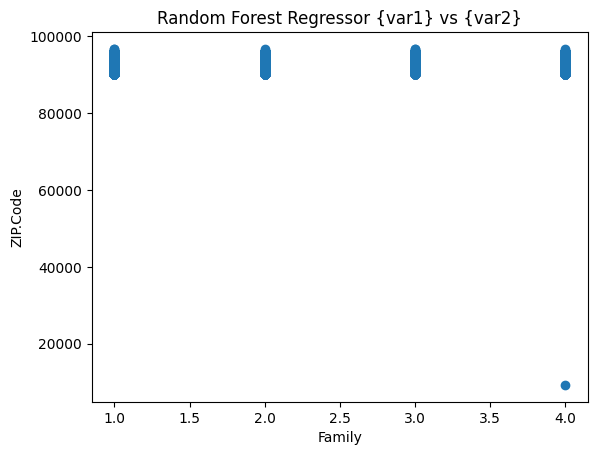

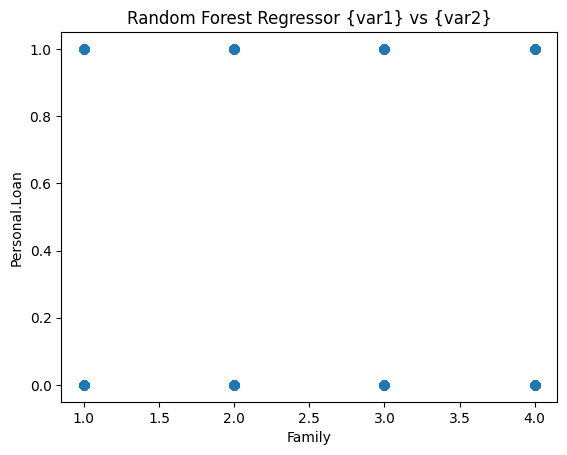

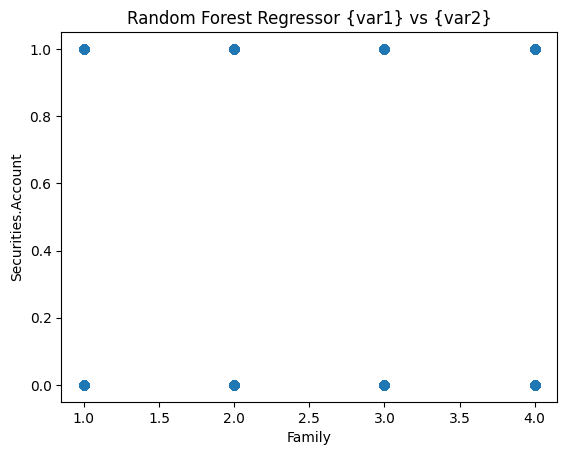

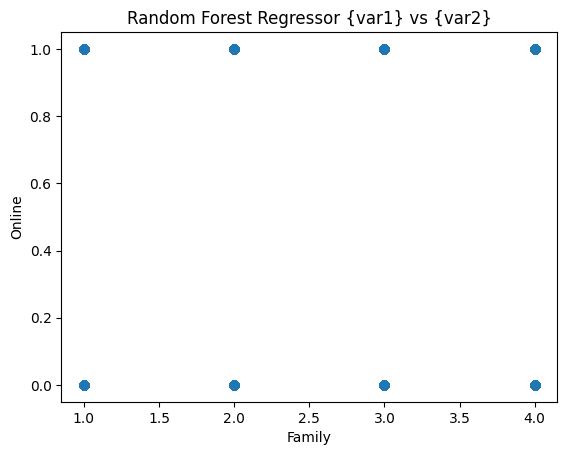

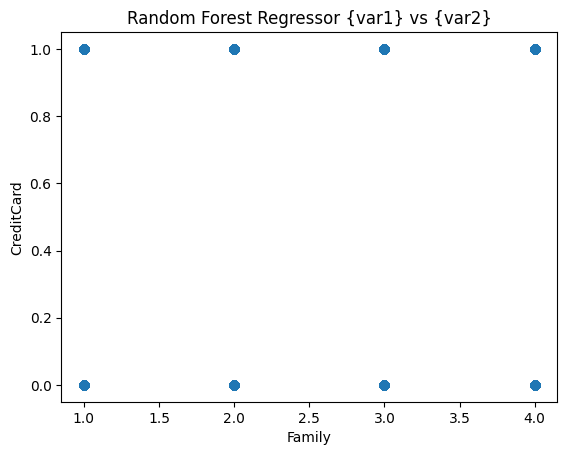

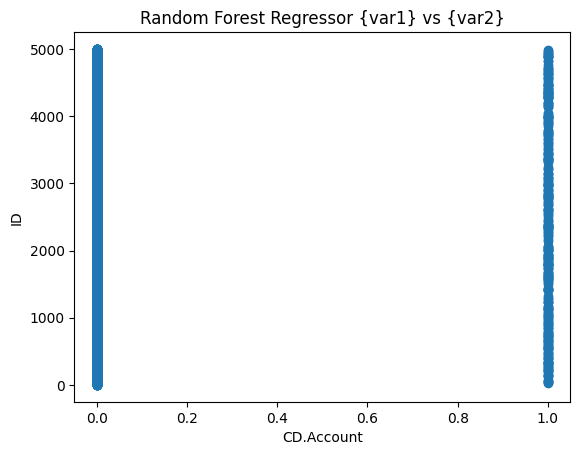

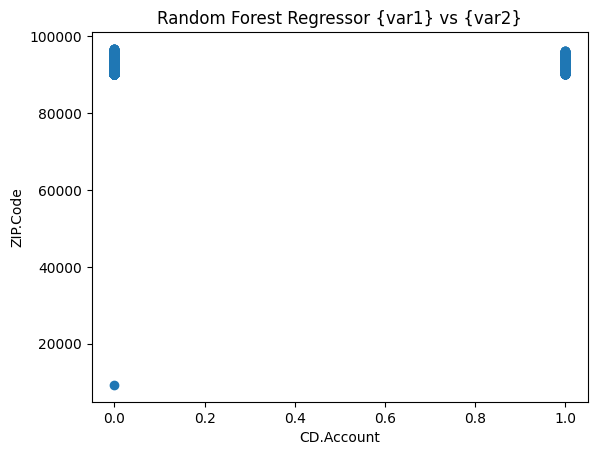

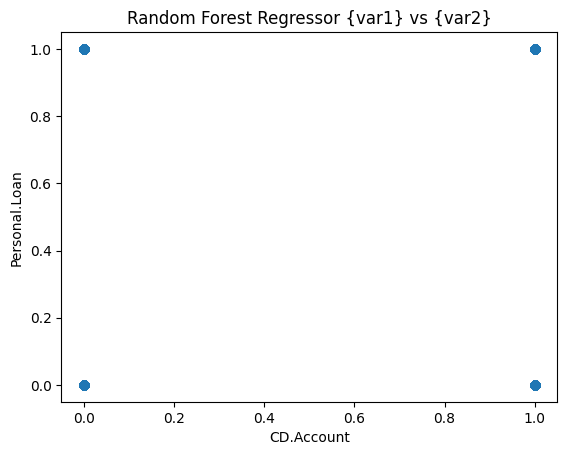

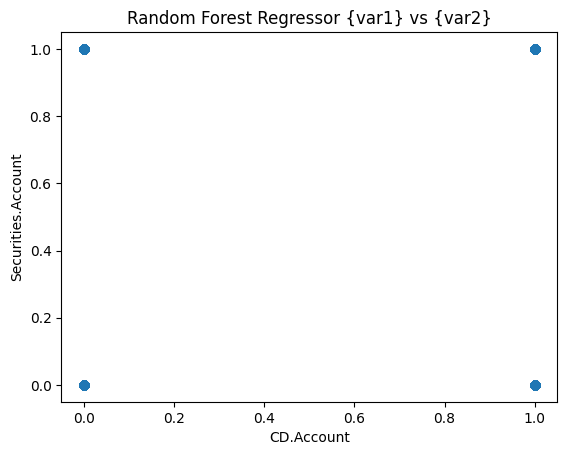

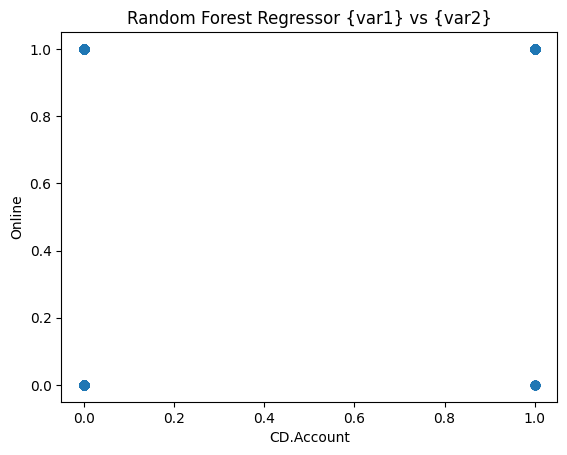

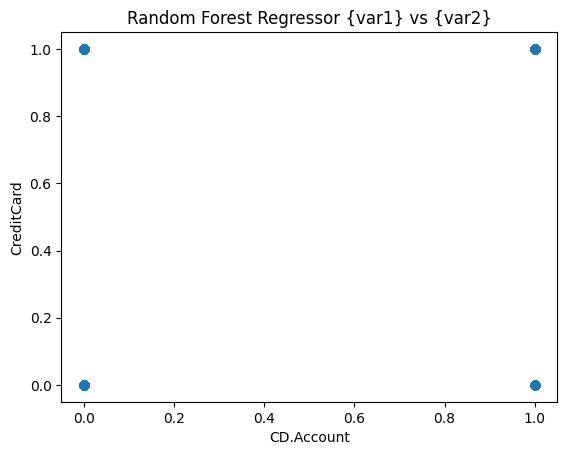

In [17]:
# First team of 7 categories
team1 = ['Income', 'CCAvg', 'Mortgage', 'Age', 'Education', 'Family', 'CD.Account']

# Second team of 6 categories
team2 = ['ID', 'ZIP.Code', 'Personal.Loan', 'Securities.Account', 'Online', 'CreditCard']

# Creating a scatter plot for each combination of variables in team1 and team2
for var1 in team1:
    for var2 in team2:
        plt.figure()
        plt.scatter(df[var1], df[var2])
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title('Random Forest Regressor {var1} vs {var2}')
        plt.show()

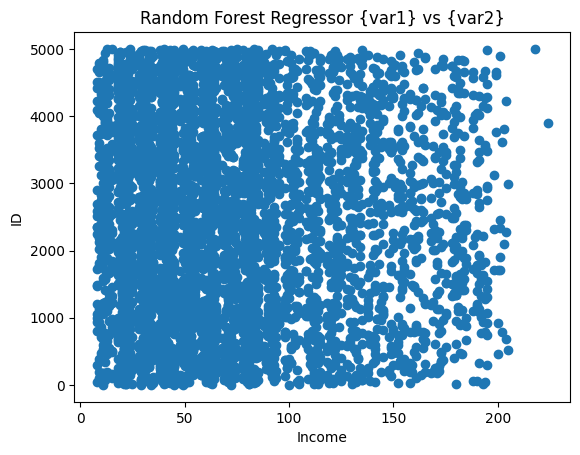

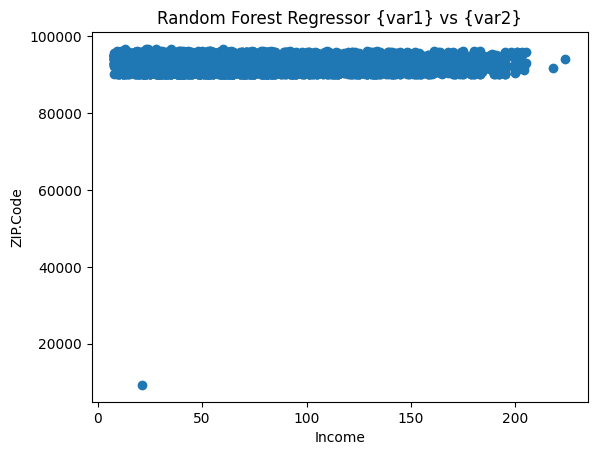

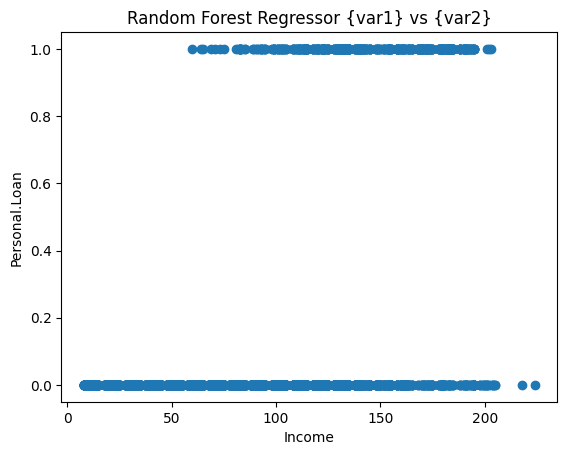

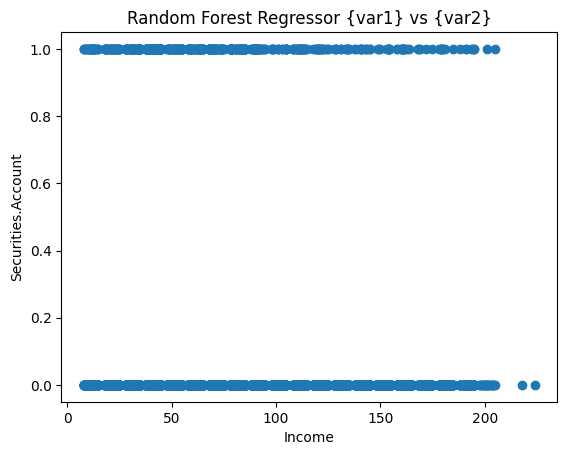

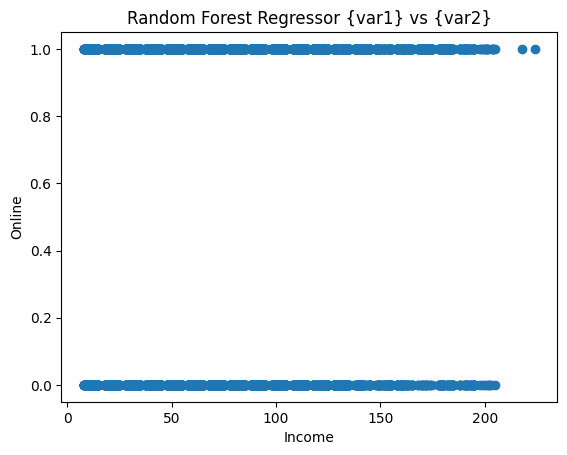

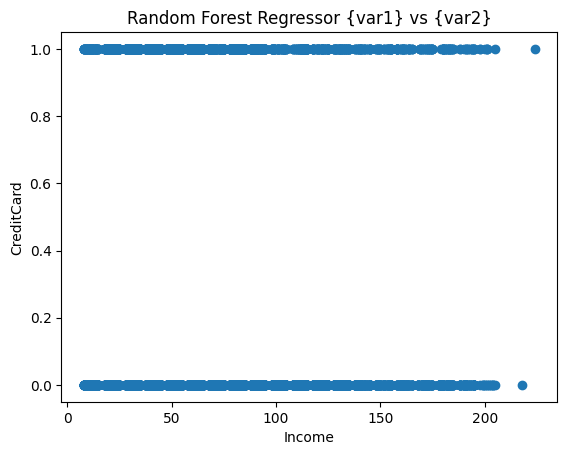

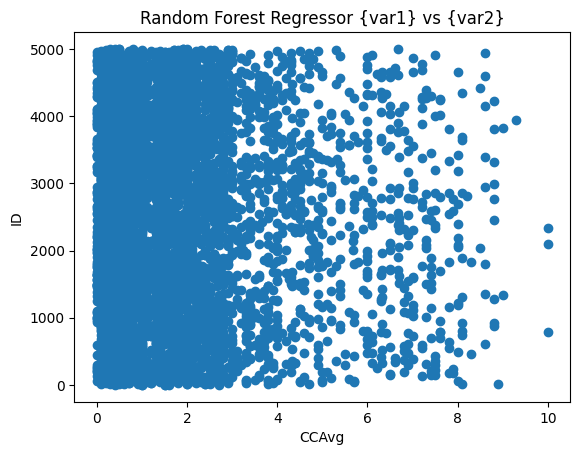

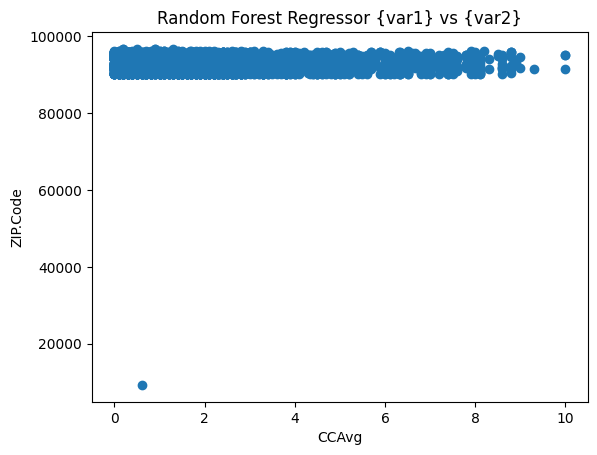

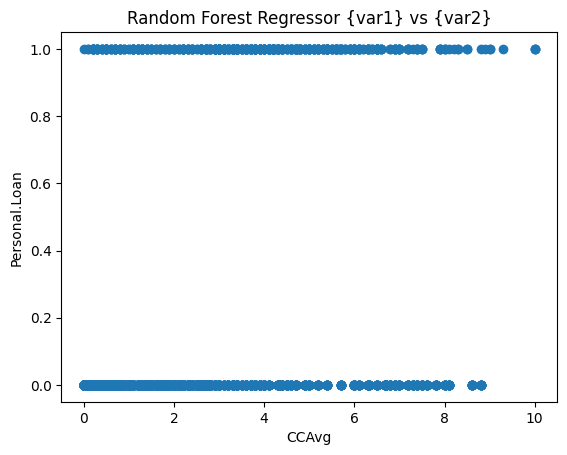

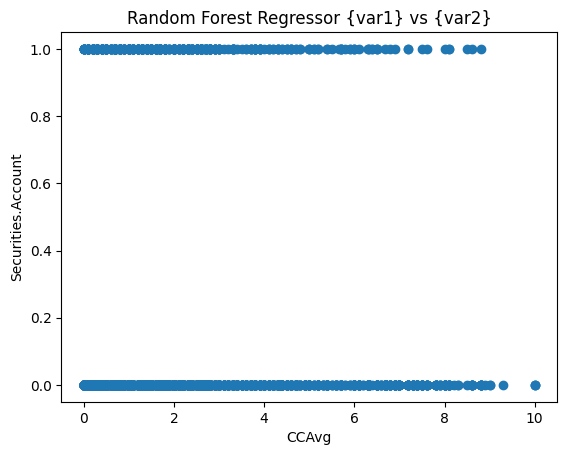

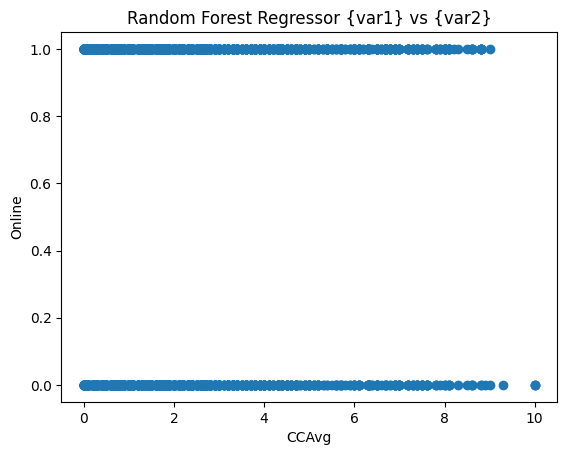

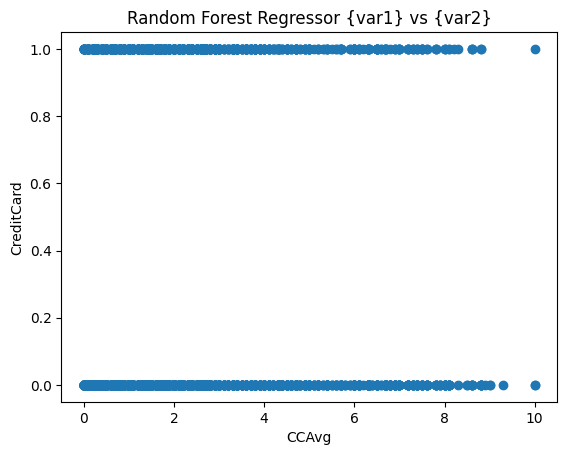

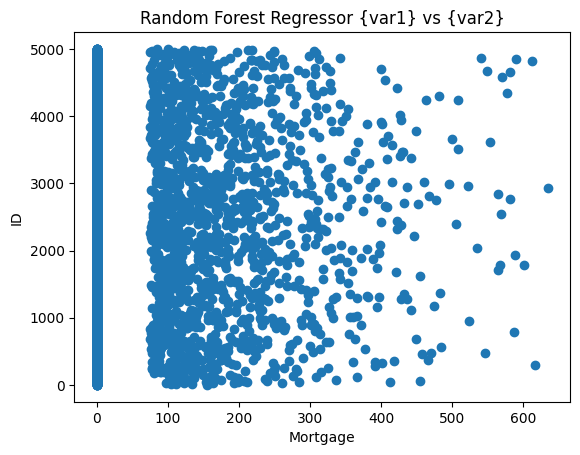

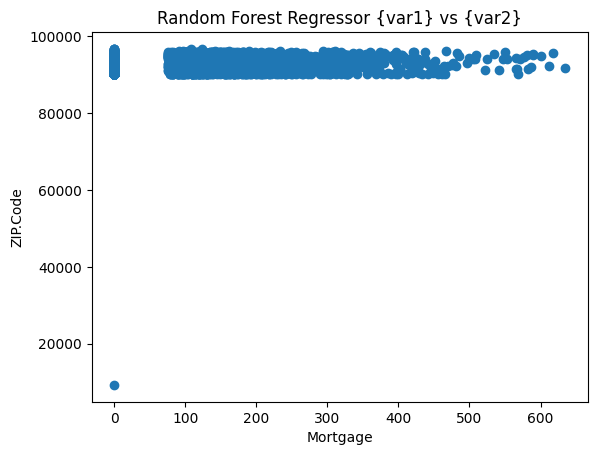

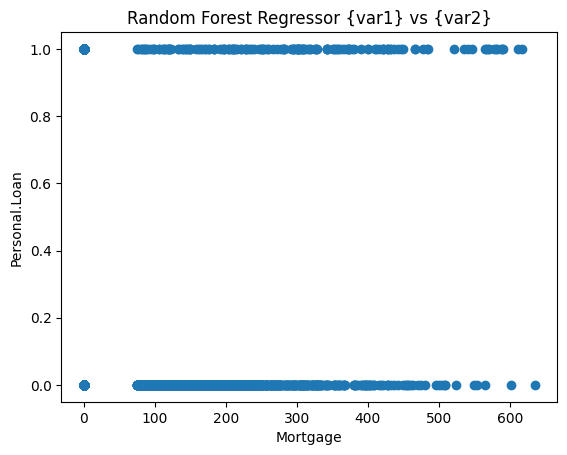

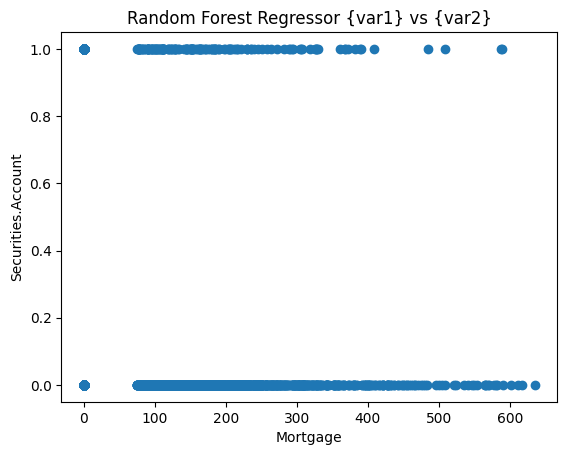

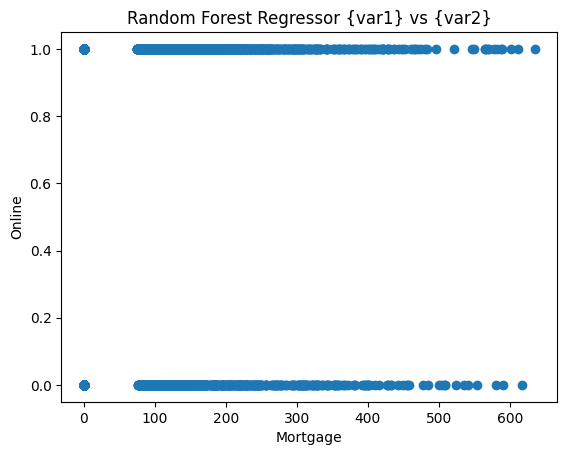

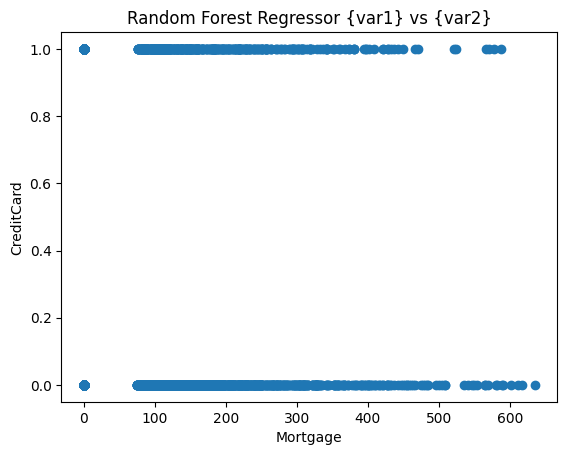

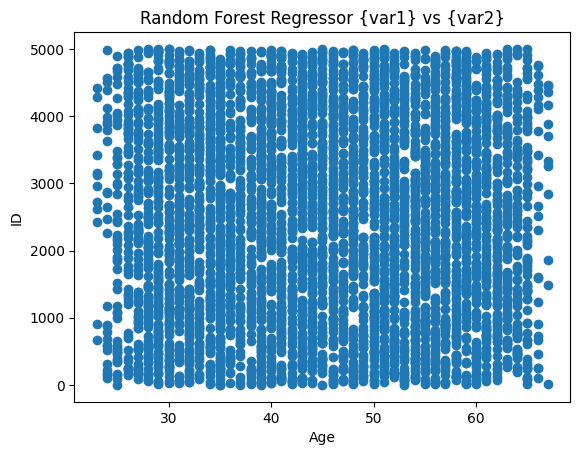

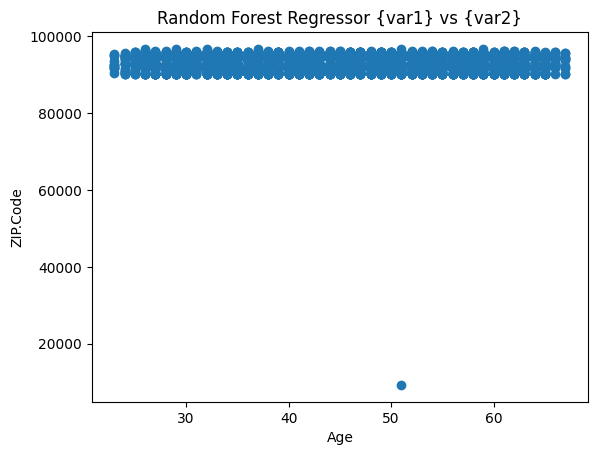

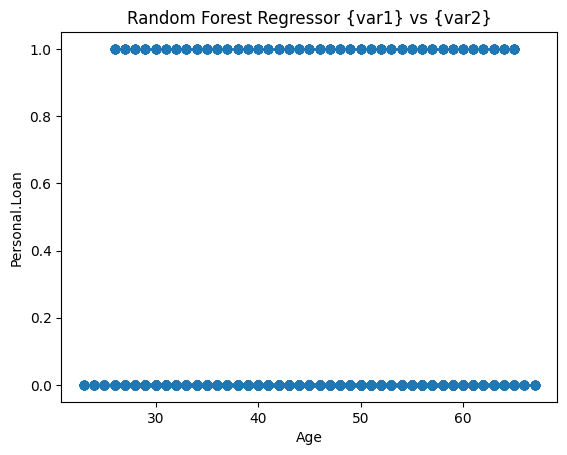

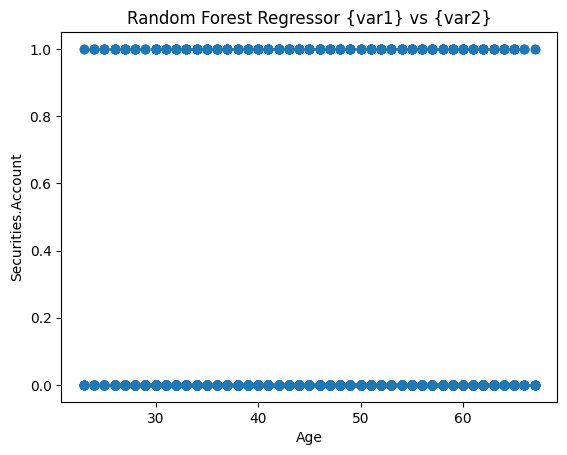

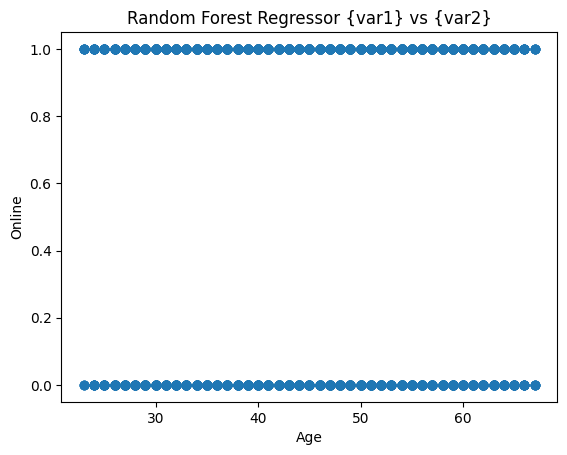

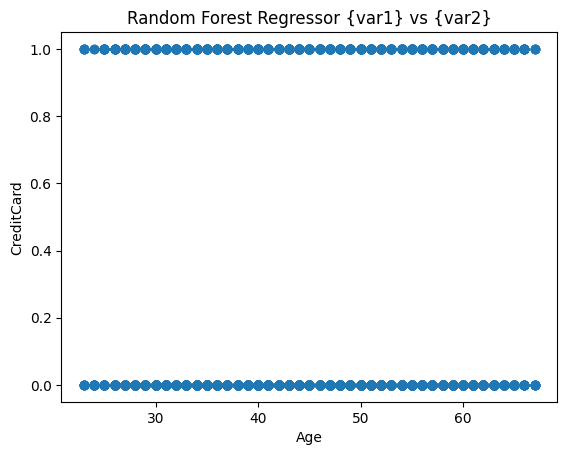

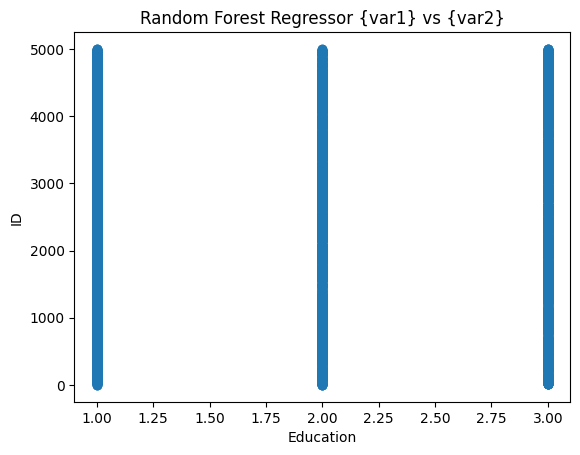

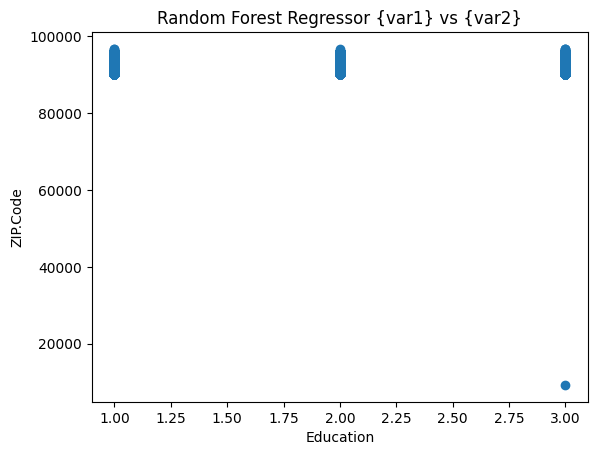

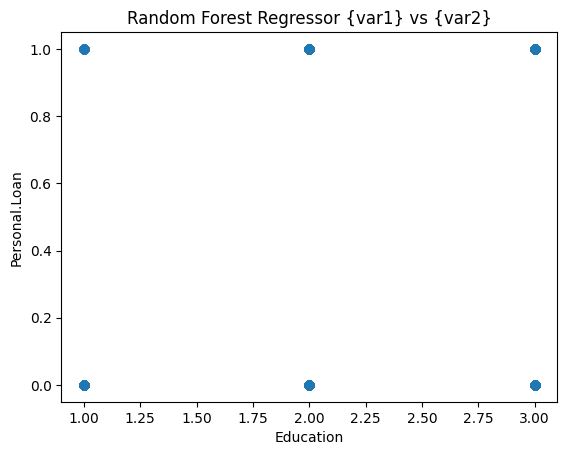

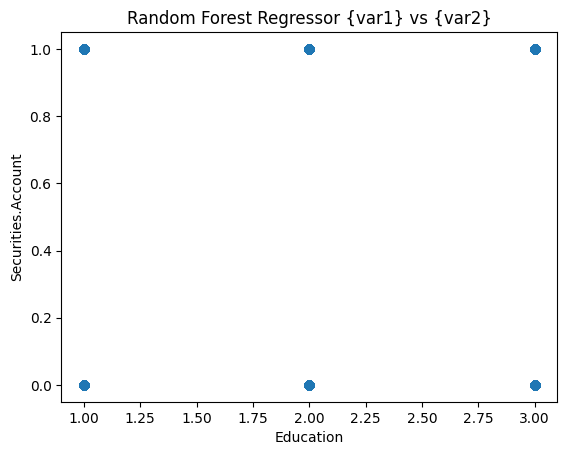

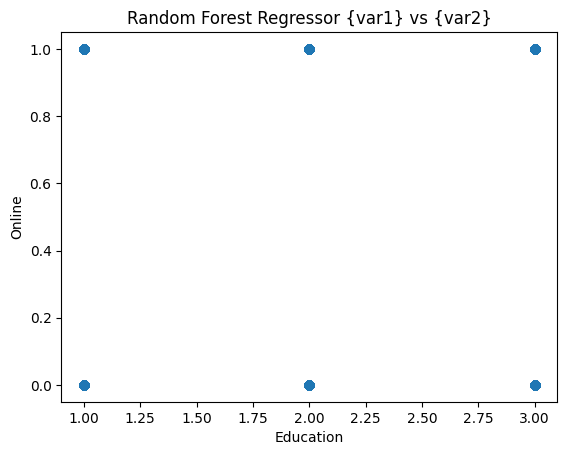

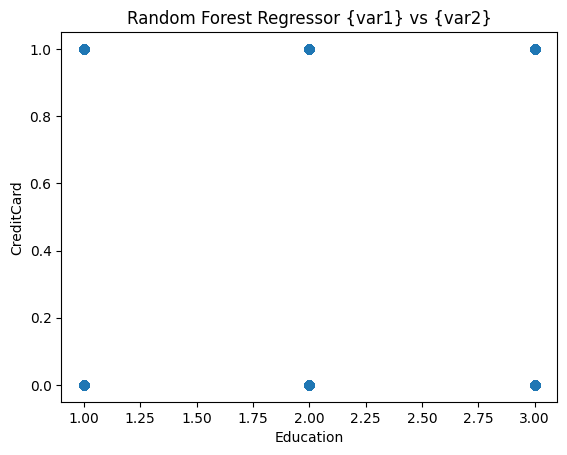

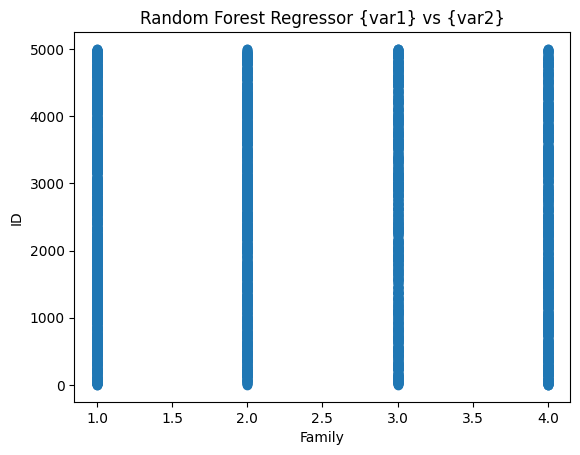

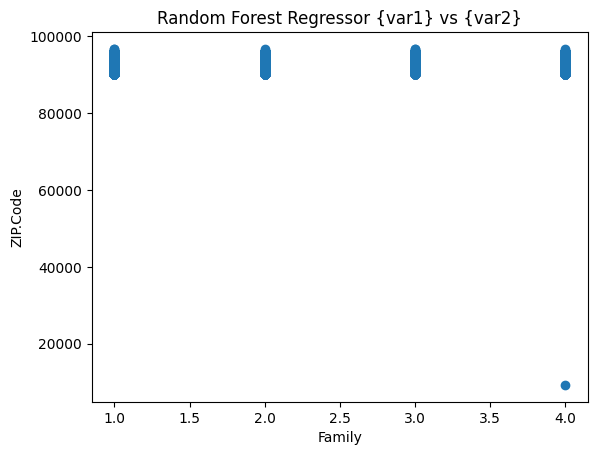

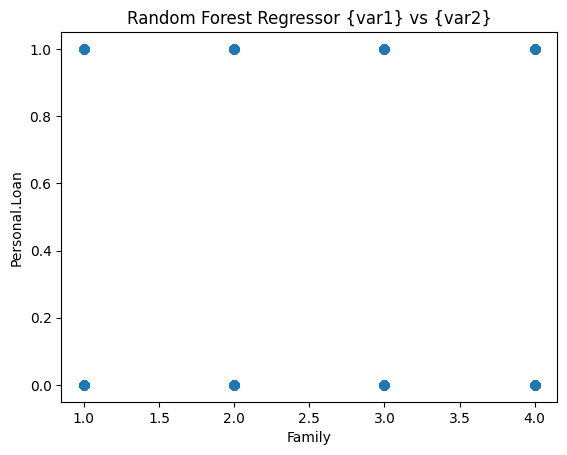

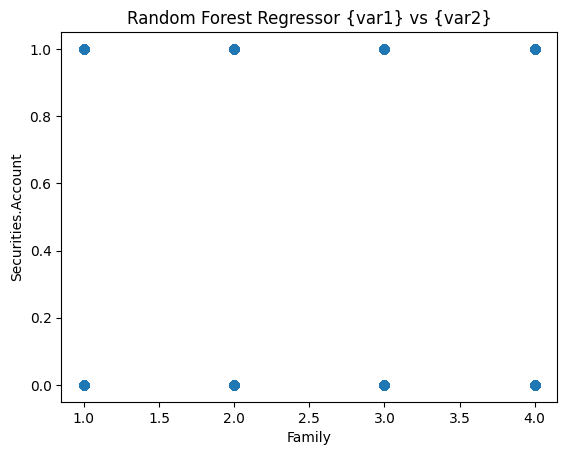

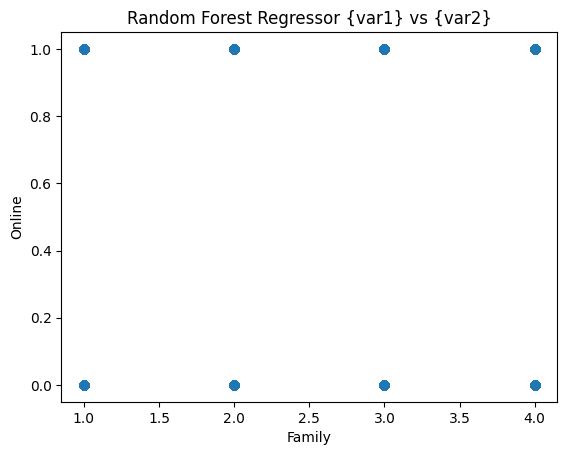

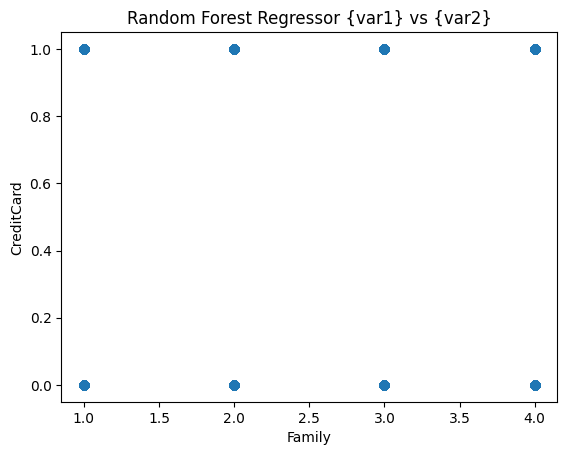

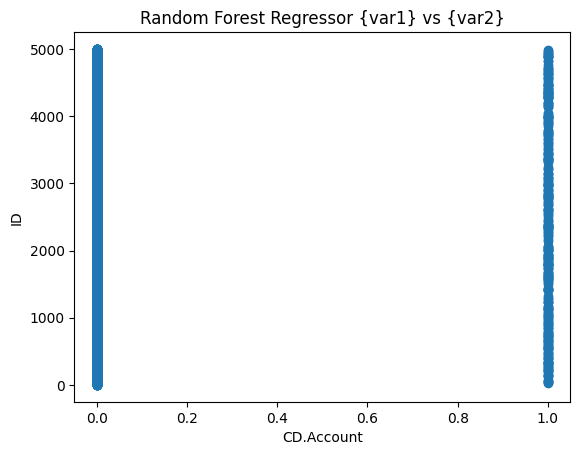

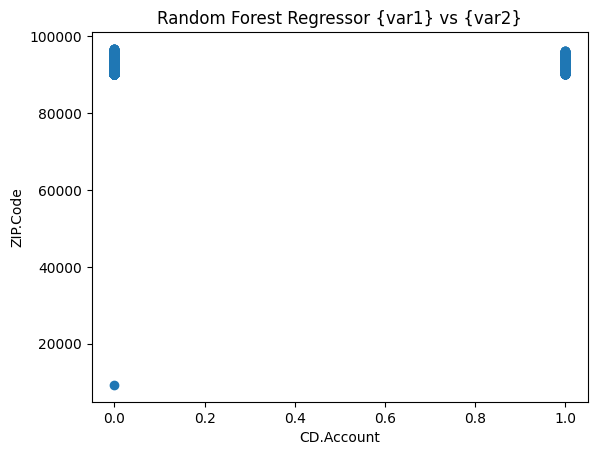

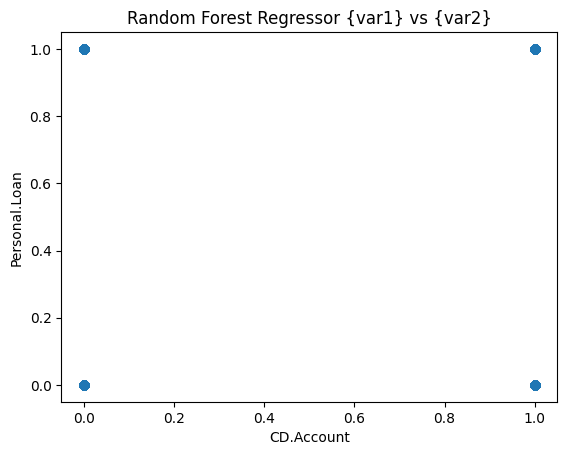

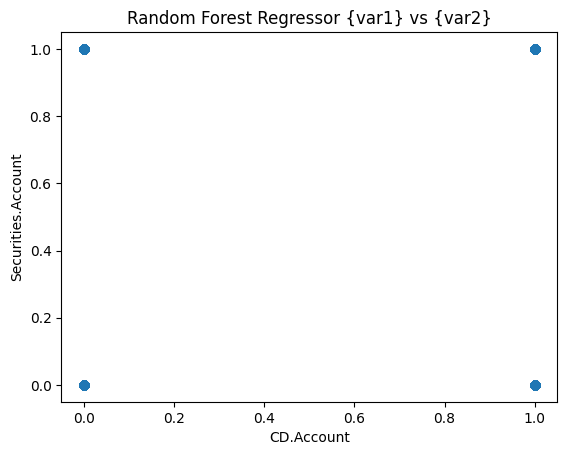

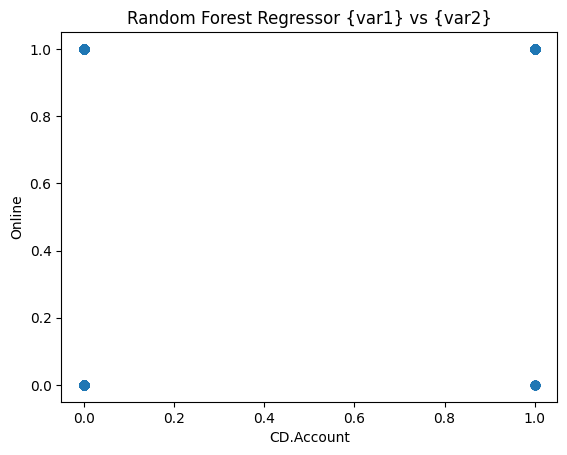

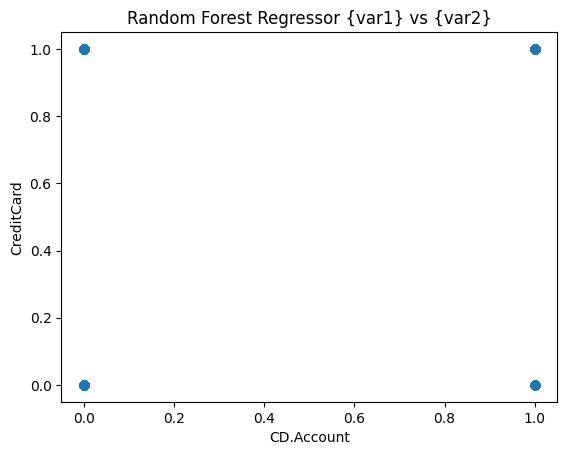

In [18]:
x_new = np.arange(min(x),max(x),0.1)

x_new = x_new.reshape(len(x_new),1)

# Creating a scatter plot for each combination of variables in team1 and team2
for var1 in team1:
    for var2 in team2:
        plt.figure()
        plt.scatter(df[var1], df[var2])
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title('Random Forest Regressor {var1} vs {var2}')
        plt.show()

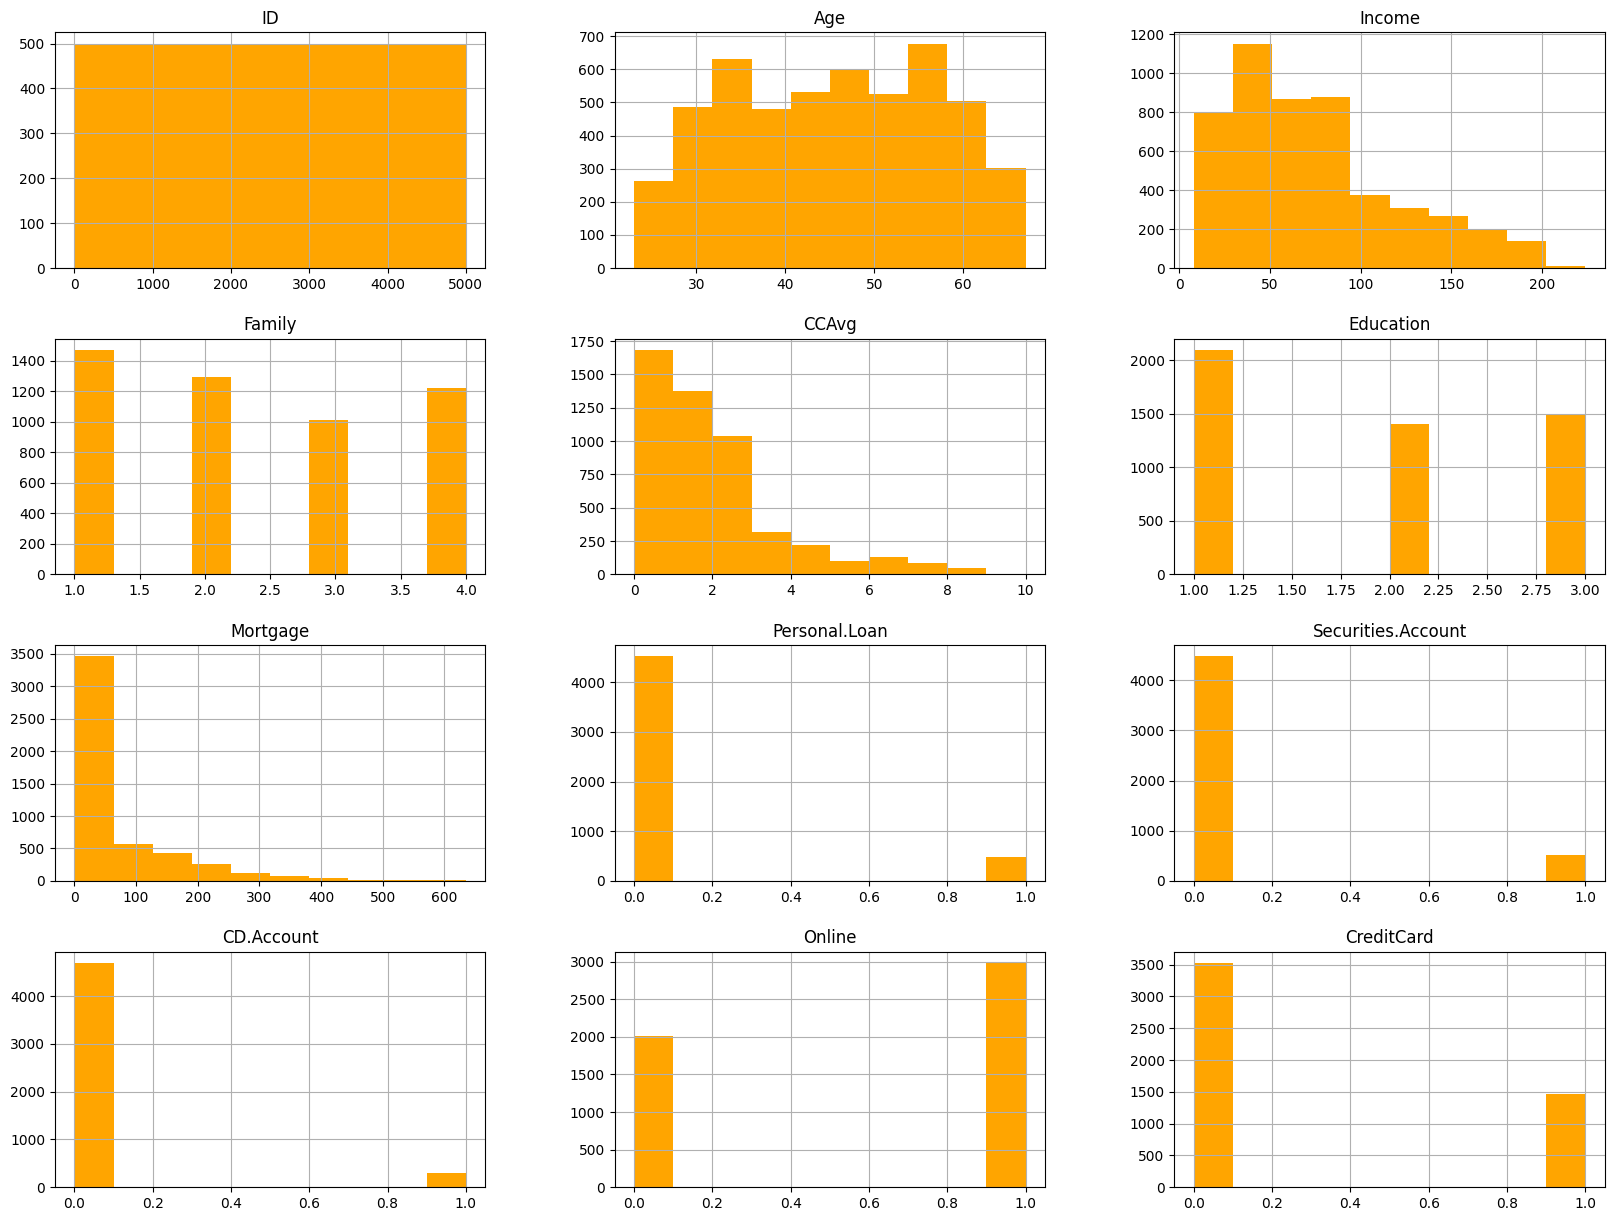

In [29]:
df.hist(figsize=(20,15),color="orange")
plt.show()

In [33]:
model.score(x,y)

0.7956433720174207